In [18]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

Decision Tree Prediction

In [26]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [27]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
trees = tree.DecisionTreeClassifier()  
trees.fit(x_train, y_train)   #fitting our model
y_pred=trees.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.770949720670391


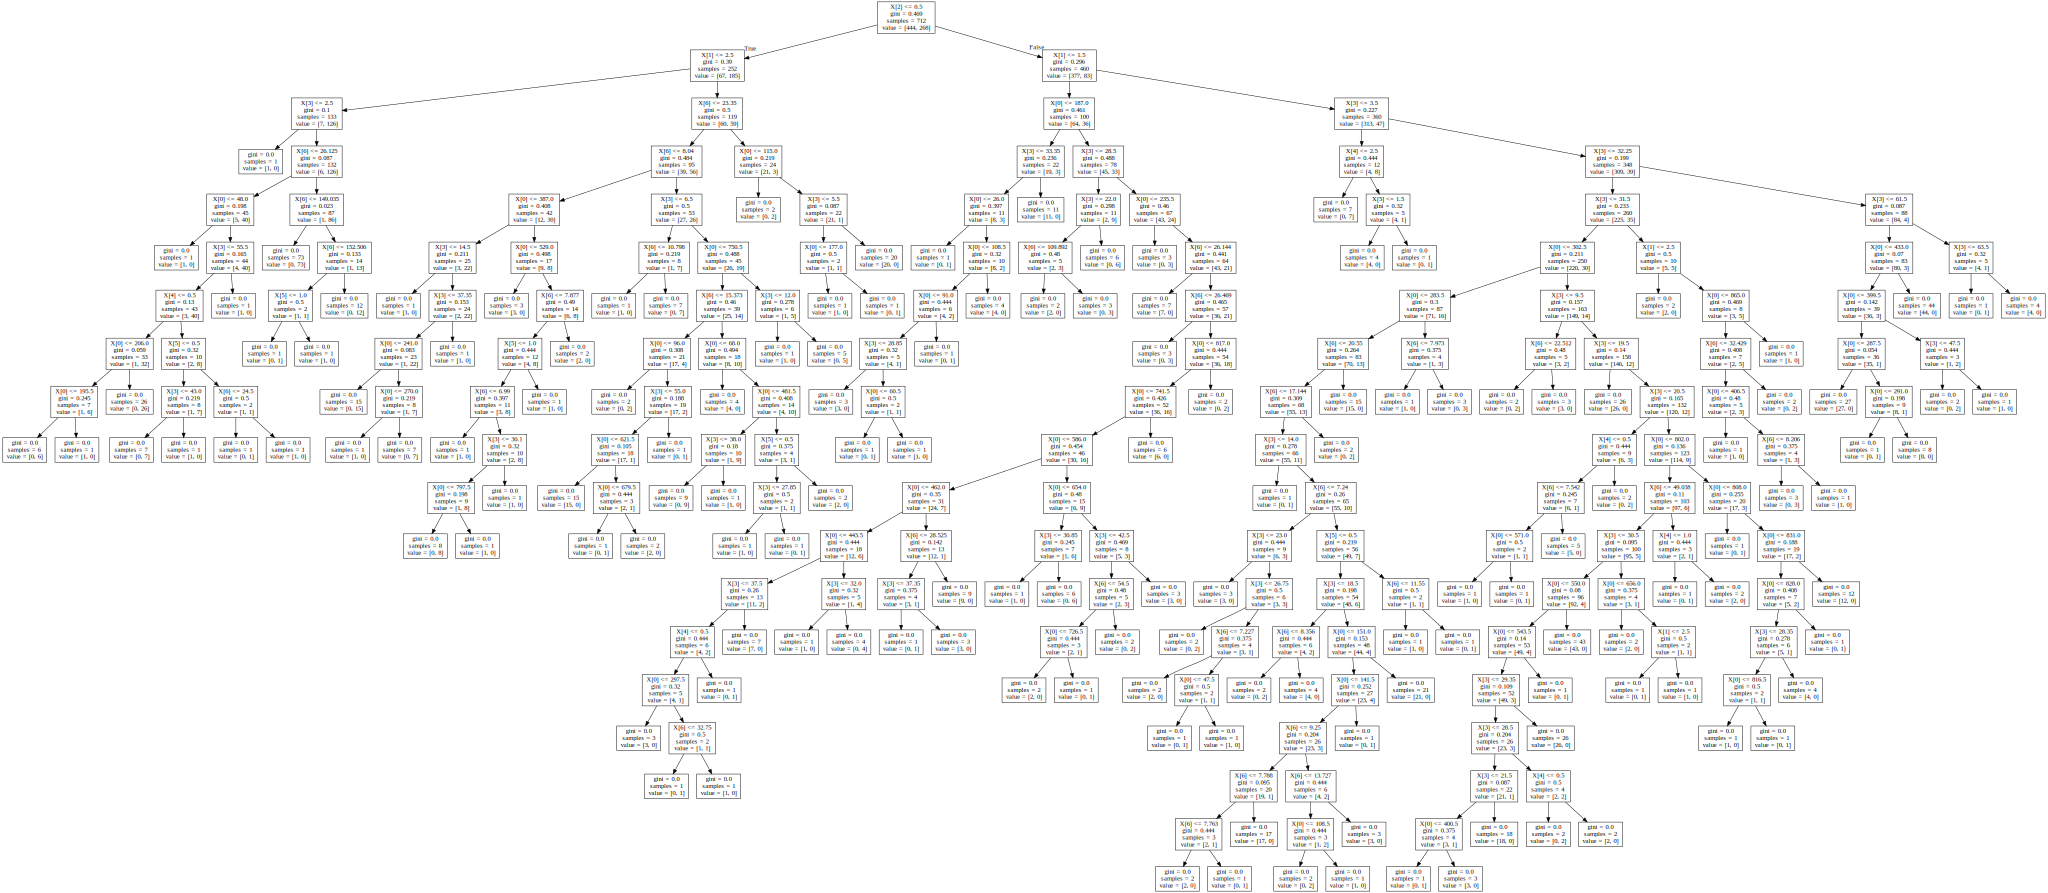

In [29]:
import graphviz
from sklearn.tree import export_graphviz

dot_data= tree.export_graphviz(trees,out_file=None)
graph= graphviz.Source(dot_data)
graph.render("data")
graph

Decision Tree Pruning Code

In [40]:
dtree= tree.DecisionTreeClassifier(criterion="gini", splitter='random', max_leaf_nodes= 10, min_samples_leaf=5, 
                                   max_depth=5)
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

**Decision Tree Pros**
Easy to understand and interpret. At each node, we are able to see exactly what decision our model is making.

Can handle numerical and categorical data.

Doesn't require a lot of preprocessing.

**Decision Tree Cons**
Calculations can become challenging when there are many target labels and Features.

Decision-tree learners can create over-complex trees that do not generalize the data well which means they suffer from Overfitting.

Decision trees are sensitive to overfitting and robust to outliers.
A tree is composed of Internal Nodes, branches and leaf nodes.

Random Forest Code


In [33]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.9111111111111111


In [39]:
clf=RandomForestClassifier(n_estimators=20) 
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888
